Author:Nutan Mandale

Mentor:Vincent Ramdhanie

### Question

Which clustering solution is best for Boston Marathon Data?

In [1]:

import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from timeit import default_timer as timer
from time import time
from IPython.display import display
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

%matplotlib inline

In [2]:
#import data
data = pd.read_csv('./results.csv')

In [3]:
data.shape

(31984, 21)

In [4]:
data.head(2)

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,...,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,...,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10


In [5]:
data.columns

Index(['10k', 'name', 'division', '25k', 'gender', 'age', 'official', 'bib',
       'genderdiv', 'ctz', '35k', 'overall', 'pace', 'state', '30k', '5k',
       'half', '20k', 'country', 'city', '40k'],
      dtype='object')

In [6]:
print(data.isnull().sum())

10k              0
name             0
division         0
25k              0
gender           0
age              0
official         0
bib              0
genderdiv        0
ctz          30740
35k              0
overall          0
pace             0
state         2576
30k              0
5k               0
half             0
20k              0
country          0
city             1
40k              0
dtype: int64


In [7]:
#data = data.dropna()

In [8]:
data.describe()

,division,age,official,genderdiv,overall,pace
count,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000
mean,1932.563032,42.407079,242.997314,8051.044741,15939.587825,9.275658
std,1715.228694,11.316496,52.300431,4754.005626,9232.978224,1.992486
min,1.000000,18.000000,80.600000,1.000000,1.000000,3.080000
25%,610.000000,33.000000,205.527500,3972.000000,7943.750000,7.850000
50%,1425.000000,42.000000,232.370000,7970.000000,15939.500000,8.870000
75%,2611.000000,50.000000,273.235000,11968.000000,23935.250000,10.430000
max,6979.000000,81.000000,538.880000,17575.000000,31931.000000,20.570000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31984 entries, 0 to 31983
Data columns (total 21 columns):
10k          31984 non-null object
name         31984 non-null object
division     31984 non-null int64
25k          31984 non-null object
gender       31984 non-null object
age          31984 non-null int64
official     31984 non-null float64
bib          31984 non-null object
genderdiv    31984 non-null int64
ctz          1244 non-null object
35k          31984 non-null object
overall      31984 non-null int64
pace         31984 non-null float64
state        29408 non-null object
30k          31984 non-null object
5k           31984 non-null object
half         31984 non-null object
20k          31984 non-null object
country      31984 non-null object
city         31983 non-null object
40k          31984 non-null object
dtypes: float64(2), int64(4), object(15)
memory usage: 5.1+ MB


In [10]:
#converting data-type to float
data = data.replace(to_replace='-', value=np.nan)
data['5k'] = data['5k'].astype(float)
data['10k'] = data['10k'].astype(float)
data['20k'] = data['20k'].astype(float)
data['25k'] = data['25k'].astype(float)
data['35k'] = data['35k'].astype(float)
data['30k'] = data['30k'].astype(float)
data['40k'] = data['40k'].astype(float)
data['half'] = data['half'].astype(float)

In [11]:
data.country.unique()

array(['JPN', 'KEN', 'RSA', 'ETH', 'SUI', 'USA', 'FRA', 'CAN', 'ESP',
       'POL', 'RUS', 'BLR', 'MAR', 'UKR', 'BRA', 'THA', 'CHN', 'ITA',
       'GER', 'GBR', 'AUS', 'SWE', 'GRE', 'SLO', 'IRL', 'KOR', 'ARG',
       'COL', 'NED', 'ISR', 'CZE', 'NOR', 'AUT', 'CRC', 'MEX', 'GUA',
       'SIN', 'DEN', 'HUN', 'BEL', 'FIN', 'CHI', 'ISL', 'VEN', 'DOM',
       'PER', 'HKG', 'SVK', 'NZL', 'TPE', 'PHI', 'CAY', 'POR', 'UAE',
       'IND', 'PAN', 'ROU', 'LUX', 'ESA', 'TRI', 'MAS', 'VGB', 'EGY',
       'BRN', 'EST', 'ECU', 'LIE', 'TUR', 'BOL', 'BAR', 'URU', 'QAT',
       'INA', 'BER', 'TAN', 'BAH', 'CRO', 'ZIM'], dtype=object)

In [12]:
country_count = len(data.country.unique())
print(country_count)

78


In [13]:
data.gender.unique()

array(['M', 'F'], dtype=object)

In [14]:
data['gender'] = data['gender'].apply(lambda x: 1 if x == 'M' else 0)

In [15]:
data_new = data[['5k','10k','20k','25k','30k','35k','40k','half','division','age','gender','pace']]

In [16]:
data_new.head(2)

,5k,10k,20k,25k,30k,35k,40k,half,division,age,gender,pace
0,8.02,17.37,37.65,47.67,59.18,71.40,80.43,39.72,8,47,1,3.27
1,16.22,32.58,65.83,82.43,99.33,116.37,132.10,69.47,1,33,0,5.30


In [17]:
print(data_new.isnull().sum())

5k           52
10k          50
20k          51
25k         216
30k          40
35k          34
40k          39
half         72
division      0
age           0
gender        0
pace          0
dtype: int64


In [18]:
data_new = data_new.dropna()

In [19]:
data_new.shape

(31649, 12)

In [20]:
# Ensure number of rows is divisble by 4
rows = data_new.shape[0] - data_new.shape[0] % 4
data_new = data_new.iloc[:rows, :]

In [21]:
y = data_new.gender

In [22]:
X = data_new.drop(['gender'], axis=1)

In [23]:
X.shape

(31648, 11)

In [24]:
# Normalize the data.
X_norm = normalize(X)

In [25]:
X.head()

,5k,10k,20k,25k,30k,35k,40k,half,division,age,pace
0,8.02,17.37,37.65,47.67,59.18,71.40,80.43,39.72,8,47,3.27
1,16.22,32.58,65.83,82.43,99.33,116.37,132.10,69.47,1,33,5.30
2,7.75,16.62,36.10,45.80,56.45,67.42,76.10,38.03,1,41,3.08
3,16.20,32.57,65.83,82.43,99.33,116.37,132.95,69.47,3,24,5.37
4,8.02,17.12,36.58,46.37,57.03,67.83,76.72,38.60,2,40,3.10


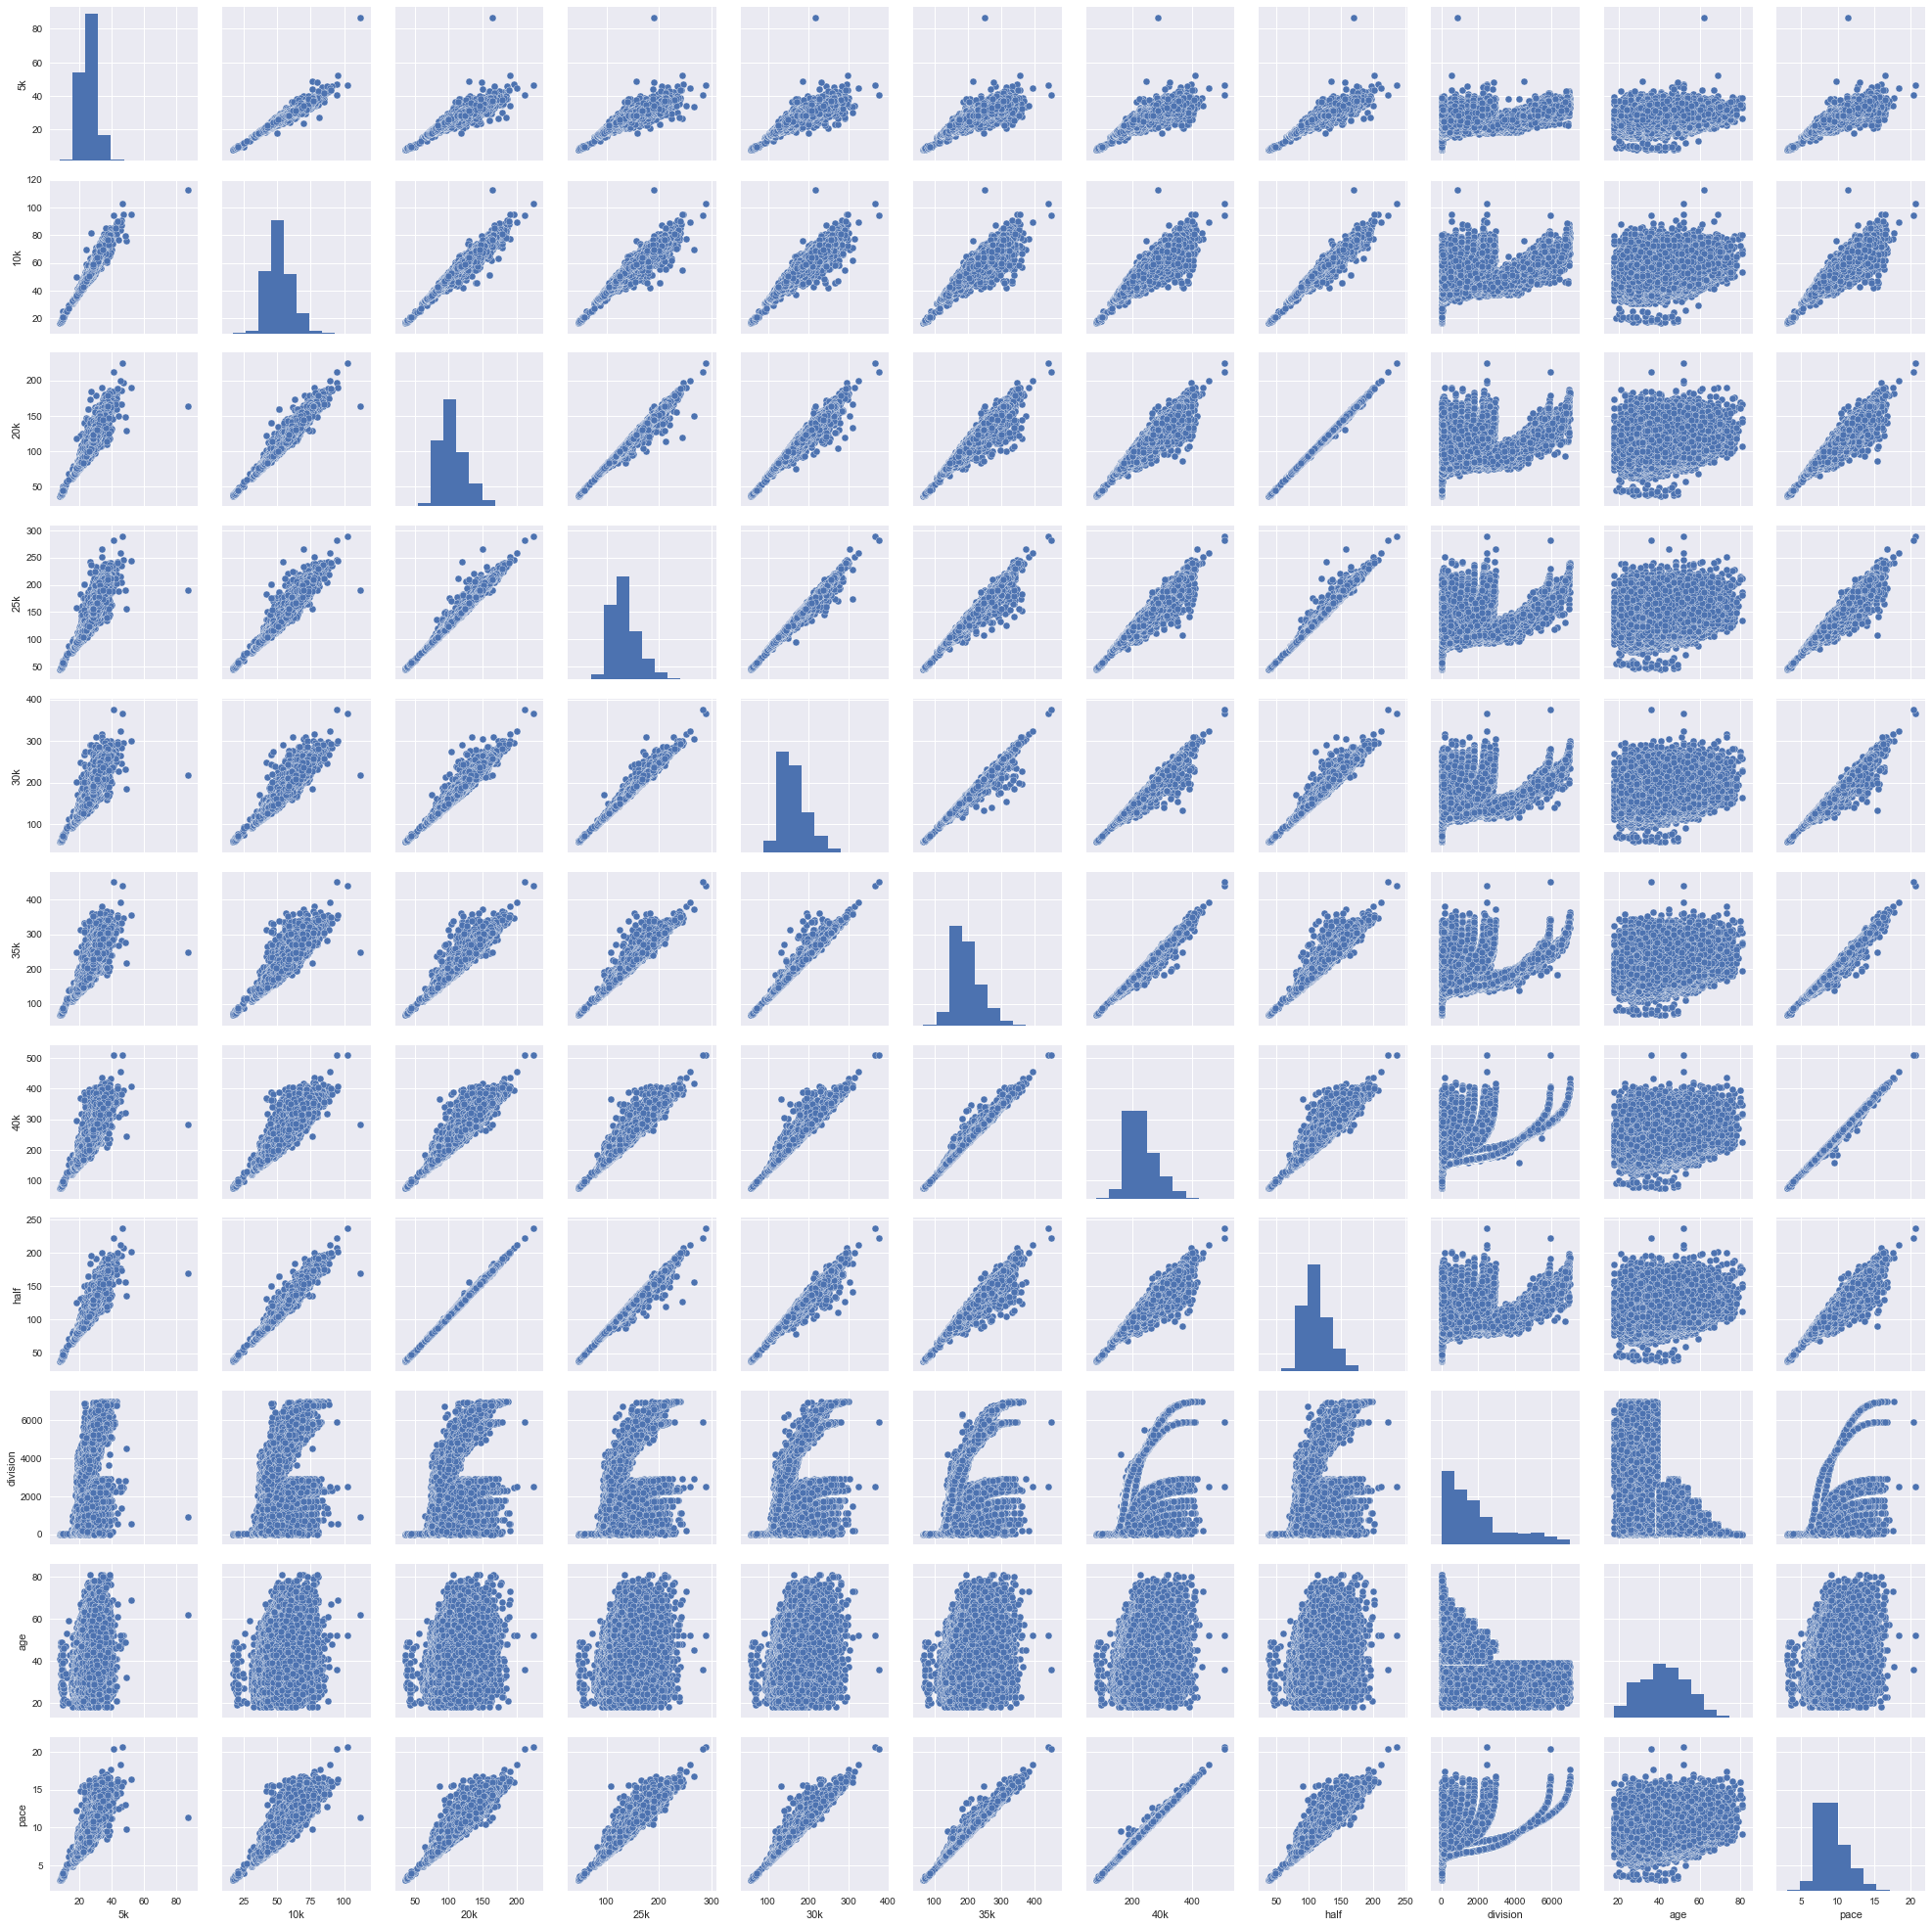

In [26]:
_ = sns.pairplot(X)

In [27]:
#PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_norm)

In [28]:
X_pca[:5]

array([[ 0.98526089,  0.24362322],
       [ 1.02741827,  0.26353541],
       [ 1.01810983,  0.27473605],
       [ 1.02119932,  0.25615739],
       [ 1.01471422,  0.26817489]])

In [29]:
# Declare an empty 
ypred = pd.DataFrame()

In [30]:
# Divide data into 4 parts
# Split the data into four equally-sized samples. First we break it in half:
X_half1, X_half2, X_pcahalf1, X_pcahalf2 = train_test_split(
    X_norm,
    X_pca,
    test_size=0.5,
    random_state=42)

# Then we halve the halves.
X1, X2, X_pca1, X_pca2 = train_test_split(
    X_half1,
    X_pcahalf1,
    test_size=0.5,
    random_state=42)
X3, X4, X_pca3, X_pca4 = train_test_split(
    X_half2,
    X_pcahalf2,
    test_size=0.5,
    random_state=42)

In [31]:
X_pca1[:5]

array([[ 0.17725106, -0.09907061],
       [-0.18860288,  0.00168312],
       [-0.18951504,  0.00160047],
       [ 0.43056315, -0.08635811],
       [ 0.18514417, -0.09890549]])

In [32]:
ypred = pd.DataFrame()

### K Means

### Consistancy Check 

 Let us see which number of clusters gives the most consistent results across the four samples and the time taken for its execution.

In [33]:
# Run kmeans on all four datasets
for counter, data in enumerate([
    (X1, X_pca1),
    (X2, X_pca2),
    (X3, X_pca3),
    (X4, X_pca4)]):
    
    # Put the features into ypred.
    ypred['pca_f1' + '_sample' + str(counter)] = data[1][:, 0]
    ypred['pca_f2' + '_sample' + str(counter)] = data[1][:, 1]
    km_start = timer()
    # Generate cluster predictions and store them for clusters 2 to 5.
    for nclust in range(2, 6):
        pred = KMeans(n_clusters=nclust, random_state=42).fit_predict(data[0])
        ypred['clust' + str(nclust) + '_sample' + str(counter)] = pred
#        pd.crosstab(ypred,pred)
    km_end = timer()
    print("Time taken: {}\n".format(km_end - km_start))
   

Time taken: 2.049388781422704

Time taken: 2.0254714939435923

Time taken: 1.7948170806531856

Time taken: 2.0922965709734207



In [34]:
X1.shape

(7912, 11)

In [35]:
# Examine ypred (results)
ypred.head()

,pca_f1_sample0,pca_f2_sample0,clust2_sample0,clust3_sample0,clust4_sample0,clust5_sample0,pca_f1_sample1,pca_f2_sample1,clust2_sample1,clust3_sample1,...,clust2_sample2,clust3_sample2,clust4_sample2,clust5_sample2,pca_f1_sample3,pca_f2_sample3,clust2_sample3,clust3_sample3,clust4_sample3,clust5_sample3
0,0.177251,-0.099071,0,0,0,2,-0.299631,0.065519,0,0,...,1,2,2,0,-0.189079,0.001768,0,0,2,3
1,-0.188603,0.001683,0,1,3,3,-0.160970,-0.011474,0,0,...,1,2,1,0,-0.084922,-0.042769,0,0,0,3
2,-0.189515,0.001600,0,1,3,3,-0.284789,0.055802,0,0,...,1,0,0,1,-0.158735,-0.012805,0,0,2,3
3,0.430563,-0.086358,1,0,2,1,0.090009,-0.088184,0,2,...,1,0,0,1,0.575066,-0.049045,1,1,1,2
4,0.185144,-0.098905,0,0,2,2,-0.261543,0.041358,0,0,...,1,0,0,1,-0.051578,-0.054186,0,0,0,3


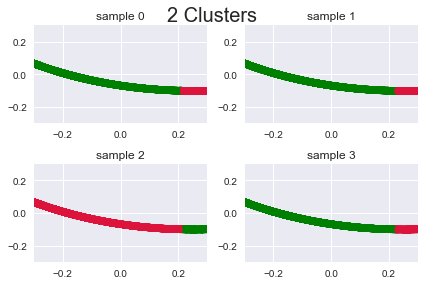

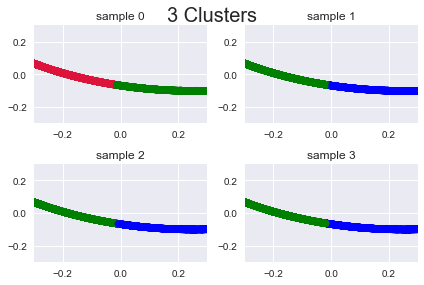

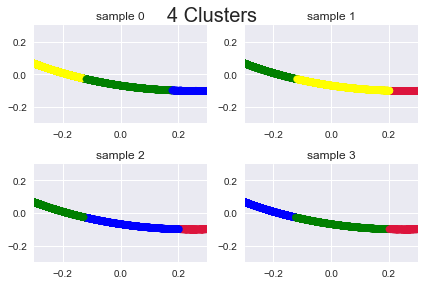

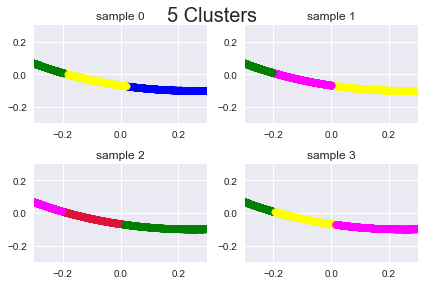

In [36]:
# plot the graphs
for cluster in range(2, 6):
    
    # Make a grid of subplots.
    f, axarr = plt.subplots(2, 2)
    
    # Make a plot for each sample.
    for i in range(4):
        
        # PCA-created features.
        x_sub = ypred['pca_f1_sample{}'.format(i)]
        y_sub = ypred['pca_f2_sample{}'.format(i)]
        
        # Cluster assignments.
        c = ypred['clust{}_sample{}'.format(cluster, i)]
        cols = {0:'g', 1:'crimson', 2:'b',3:'yellow',4:'magenta'}
        col = [cols[i] for i in c]
        # Assign the subplot to its place on the grid.
        rows = int(np.floor(i / 2))
        cols = i % 2
        axarr[rows, cols].scatter(x_sub, y_sub, c=col)
        axarr[rows, cols].set_title('sample {}'.format(i))
        axarr[rows, cols].set_xlim([-.3, .3])
        axarr[rows, cols].set_ylim([-.3, .3])
    
    # Space out the plots so that the headings don't overlap axis values.
    plt.suptitle('{} Clusters'.format(cluster), fontsize=20)
    plt.tight_layout()
    plt.show()
    print('\n')

We see cluster 2 and cluster 3 gives us the most consistant results.Let us evaluate other factors with cluster = 2.

In [37]:
full_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X_norm)

pd.crosstab(y, full_pred) 

col_0,0,1
gender,,
0,3191,10974
1,3471,14012


In [38]:
full_pred = KMeans(n_clusters=3, random_state=42).fit_predict(X_norm)

pd.crosstab(y, full_pred) 

col_0,0,1,2
gender,,,
0,9344,2966,1855
1,11747,3704,2032


### Checking Adjusted Rand Index

In [39]:
from sklearn import metrics
    
metrics.adjusted_rand_score(y, full_pred)

0.0015784229048248636

This is very low.

### Silhouette coefficient

In [40]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances

for sample in [X1, X2, X3, X4]:
    model = KMeans(n_clusters=2, random_state=42).fit(sample)
    labels = model.labels_
    print(metrics.silhouette_score(sample, labels, metric='euclidean'))

0.714339738935
0.726034237509
0.719555399506
0.720687234292


In [41]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances

for sample in [X1, X2, X3, X4]:
    model = KMeans(n_clusters=3, random_state=42).fit(sample)
    labels = model.labels_
    print(metrics.silhouette_score(sample, labels, metric='euclidean'))

0.644882938467
0.656185480191
0.652808344029
0.641892135045


### Mean Shift

In [42]:
# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.

mean_shift_pred = pd.DataFrame()

for counter, data in enumerate([
    (X1, X_pca1),
    (X2, X_pca2),
    (X3, X_pca3),
    (X4, X_pca4)]):
    
    # Put the features into ypred.
    mean_shift_pred['pca_f1' + '_sample' + str(counter)] = data[1][:, 0]
    mean_shift_pred['pca_f2' + '_sample' + str(counter)] = data[1][:, 1]

    print("Sample Number: {}".format(counter))   
    
    for quant in [0.1, 0.2, 0.3, 0.4]:
        
        print("Quantile: {}".format(quant))

        km_start = timer()
        bandwidth = estimate_bandwidth(data[0], quantile=quant, n_samples=7912)
        print("Estimated Bandwidth used: {}".format(bandwidth))

        # Declare and fit the model.
        ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
        pred = ms.fit_predict(data[0])
        mean_shift_pred['Cluster_' + str(quant) + 'Sample_' + str(counter)] = pred

        # Extract cluster assignments for each data point.
        labels = ms.labels_

        # Coordinates of the cluster centers.
        cluster_centers = ms.cluster_centers_

        # Count our clusters.
        n_clusters_ = len(np.unique(labels))

        print("Number of estimated clusters: {}".format(n_clusters_))

        km_end = timer()
        print("Time taken: {}\n".format(km_end - km_start))
    

Sample Number: 0
Quantile: 0.1
Estimated Bandwidth used: 0.0800238230131232
Number of estimated clusters: 8
Time taken: 6.116466422580842

Quantile: 0.2
Estimated Bandwidth used: 0.1475221198814011
Number of estimated clusters: 2
Time taken: 7.631223351918663

Quantile: 0.3
Estimated Bandwidth used: 0.21325858143169482
Number of estimated clusters: 2
Time taken: 10.31227234088125

Quantile: 0.4
Estimated Bandwidth used: 0.26145202985316185
Number of estimated clusters: 1
Time taken: 13.9221683032019

Sample Number: 1
Quantile: 0.1
Estimated Bandwidth used: 0.08049973418274595
Number of estimated clusters: 7
Time taken: 5.673837078288187

Quantile: 0.2
Estimated Bandwidth used: 0.15426843118777886
Number of estimated clusters: 3
Time taken: 7.326779606562212

Quantile: 0.3
Estimated Bandwidth used: 0.22122455733483548
Number of estimated clusters: 2
Time taken: 10.346674609496148

Quantile: 0.4
Estimated Bandwidth used: 0.27046147918832275
Number of estimated clusters: 2
Time taken: 13.

In [43]:
mean_shift_pred.head()

,pca_f1_sample0,pca_f2_sample0,Cluster_0.1Sample_0,Cluster_0.2Sample_0,Cluster_0.3Sample_0,Cluster_0.4Sample_0,pca_f1_sample1,pca_f2_sample1,Cluster_0.1Sample_1,Cluster_0.2Sample_1,...,Cluster_0.1Sample_2,Cluster_0.2Sample_2,Cluster_0.3Sample_2,Cluster_0.4Sample_2,pca_f1_sample3,pca_f2_sample3,Cluster_0.1Sample_3,Cluster_0.2Sample_3,Cluster_0.3Sample_3,Cluster_0.4Sample_3
0,0.177251,-0.099071,2,0,0,0,-0.299631,0.065519,0,0,...,1,0,0,0,-0.189079,0.001768,1,0,0,0
1,-0.188603,0.001683,1,0,0,0,-0.160970,-0.011474,1,0,...,2,0,0,0,-0.084922,-0.042769,1,0,0,0
2,-0.189515,0.001600,1,0,0,0,-0.284789,0.055802,0,0,...,1,0,0,0,-0.158735,-0.012805,1,0,0,0
3,0.430563,-0.086358,3,1,1,0,0.090009,-0.088184,2,0,...,1,0,0,0,0.575066,-0.049045,4,1,1,0
4,0.185144,-0.098905,2,0,0,0,-0.261543,0.041358,0,0,...,1,0,0,0,-0.051578,-0.054186,1,0,0,0


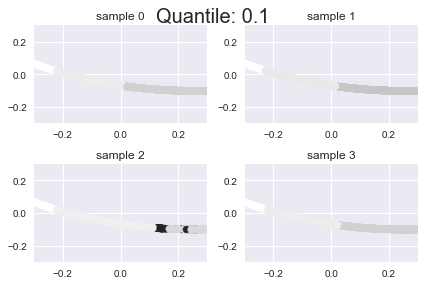

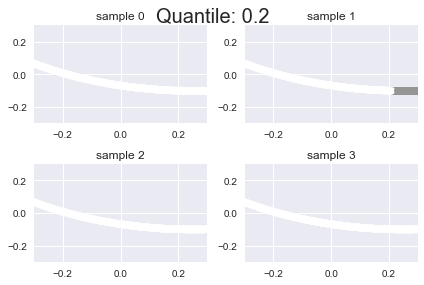

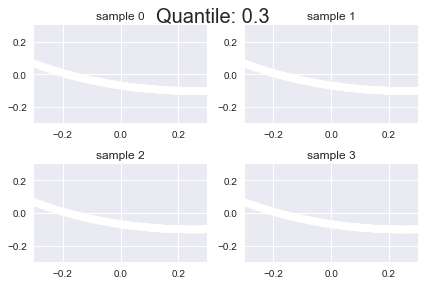

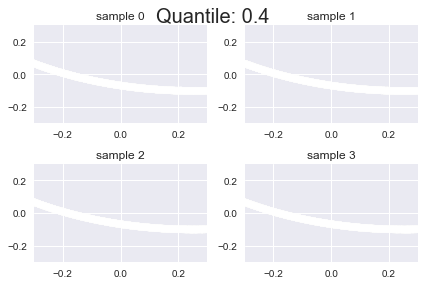

In [44]:
# plot the graphs
for quantile in [0.1, 0.2, 0.3, 0.4]:
    
    # Make a grid of subplots.
    f, axarr = plt.subplots(2, 2)
    
    # Make a plot for each sample.
    for i in range(4):
        
        # PCA-created features.
        x_sub = mean_shift_pred['pca_f1_sample{}'.format(i)]
        y_sub = mean_shift_pred['pca_f2_sample{}'.format(i)]
        
        # Cluster assignments.
        c = mean_shift_pred['Cluster_{}Sample_{}'.format(quantile, i)]
        #colors = {0:'g', 1:'crimson', 2:'b',3:'yellow',4:'magenta'}
        #color = [colors[i] for i in c]
        # Assign the subplot to its place on the grid.
        rows = int(np.floor(i / 2))
        cols = i % 2
        axarr[rows, cols].scatter(x_sub, y_sub, c=c)
        axarr[rows, cols].set_title('sample {}'.format(i))
        axarr[rows, cols].set_xlim([-.3, .3])
        axarr[rows, cols].set_ylim([-.3, .3])
    
    # Space out the plots so that the headings don't overlap axis values.
    plt.suptitle('Quantile: {}'.format(quantile), fontsize=20)
    plt.tight_layout()
    plt.show()
    print('\n')

In [45]:

bandwidth = estimate_bandwidth(X1, quantile=0.2, n_samples=7912)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X1)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))


Number of estimated clusters: 2


In [46]:

from sklearn.cluster import MeanShift, estimate_bandwidth

bandwidth = estimate_bandwidth(X1, quantile=0.2, n_samples=500)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
pred = ms.fit_predict(X_pca)

pd.crosstab(y,pred)

col_0,0,1
gender,,
0,11828,2337
1,14780,2703


### Checking Adjusted Rand Index

In [47]:
from sklearn import metrics
    
metrics.adjusted_rand_score(y, pred)

0.0015631069471686908

### Silhouette coefficient

In [48]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances

for sample in [X1, X2, X3, X4]:
    bandwidth = estimate_bandwidth(sample, quantile=0.2, n_samples=500)

    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(sample)
    labels = model.labels_
    print(metrics.silhouette_score(sample, labels, metric='euclidean'))

-0.00257927371756
-0.0176280024806
-0.0163896880354
0.641892135045


### Spectal Clustering

In [49]:
ypred_sc = pd.DataFrame()

In [50]:
from sklearn.cluster import SpectralClustering
for counter, data in enumerate([
    (X1, X_pca1),
    (X2, X_pca2),
    (X3, X_pca3),
    (X4, X_pca4)]):
    
    # Put the features into ypred.
    ypred_sc['pca_f1' + '_sample' + str(counter)] = data[1][:, 0]
    ypred_sc['pca_f2' + '_sample' + str(counter)] = data[1][:, 1]
    km_start = timer()
    
    # Generate cluster predictions and store them for clusters 2 to 5.
    for nclust in range(2, 6):
        pred = SpectralClustering(n_clusters=nclust).fit_predict(data[0])
        ypred_sc['clust' + str(nclust) + '_sample' + str(counter)] = pred

    km_end = timer()
    print("Time taken: {}\n".format(km_end - km_start))

Time taken: 112.06765505808755

Time taken: 114.49020243059505

Time taken: 109.9533979022898

Time taken: 110.6411862481956



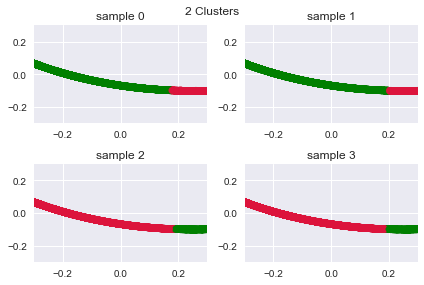

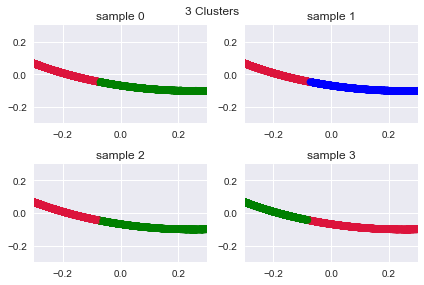

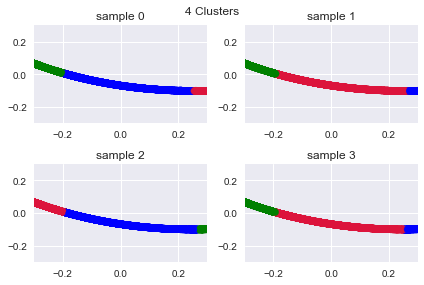

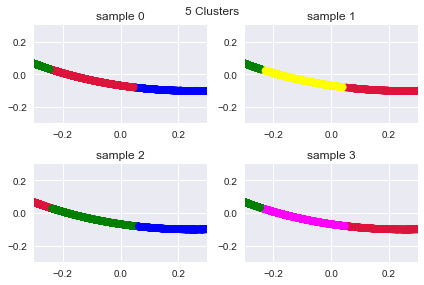

In [ ]:
# plot the graphs
for cluster in range(2, 6):
    
    # Make a grid of subplots.
    f, axarr = plt.subplots(2, 2)
    
    # Make a plot for each sample.
    for i in range(4):
        
        # PCA-created features.
        x_sub = ypred_sc['pca_f1_sample{}'.format(i)]
        y_sub = ypred_sc['pca_f2_sample{}'.format(i)]
        
        # Cluster assignments.
        c = ypred_sc['clust{}_sample{}'.format(cluster, i)]
        cols = {0:'g', 1:'crimson', 2:'b',3:'yellow',4:'magenta'}
        col = [cols[i] for i in c]
        # Assign the subplot to its place on the grid.
        rows = int(np.floor(i / 2))
        cols = i % 2
        axarr[rows, cols].scatter(x_sub, y_sub, c=col)
        axarr[rows, cols].set_title('sample {}'.format(i))
        axarr[rows, cols].set_xlim([-.3, .3])
        axarr[rows, cols].set_ylim([-.3, .3])
    
    # Space out the plots so that the headings don't overlap axis values.
    plt.suptitle('{} Clusters'.format(cluster), fontsize=12)
    plt.tight_layout()
    plt.show()
    print('\n')

In [ ]:
full_pred_sc = SpectralClustering(n_clusters=2).fit_predict(X_norm)
pd.crosstab(y, full_pred_sc) 

### Checking Adjusted Rand Index

In [ ]:
from sklearn import metrics    
metrics.adjusted_rand_score(y, full_pred_sc)

### Silhouette coefficient

In [ ]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances

for sample in [X1, X2, X3, X4]:
    model = SpectralClustering(n_clusters=2, random_state=42).fit(sample)
    labels = model.labels_
    print(metrics.silhouette_score(sample, labels, metric='euclidean'))